In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale ## scale for normalization of data

from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
df_wines = pd.read_csv('wine.csv')
df_wines.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Exploratory Data Analysis (EDA)**

In [3]:
# Drop first column type since this is not actual data column as stated in problem statement
df_wines = df_wines.iloc[:,1:]
df_wines.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df_wines.shape

(178, 13)

In [5]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df_wines[df_wines.duplicated()].count()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
df_wines.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


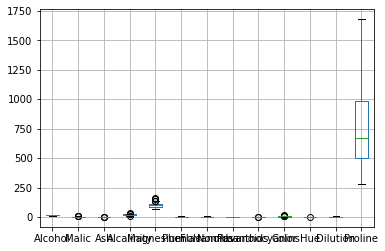

In [8]:
df_wines.boxplot()

Observation: No null values exist

No duplicate rows exist.

All values are not too far away from mean. No need of outlier imputation.

In [9]:
# Create two data frames with original data to use with PCA clustering models creation 
# and without PCA clustering models creation
df_wines_with_pca = df_wines.copy()
df_wines_without_pca = df_wines.copy()


# Model Creations with PCA

## **Perform PCA (Prinipal Component Analysis)**

In [10]:
pca = PCA()
df_wines_pca_temp = pca.fit_transform(df_wines)
df_wines_pca_temp

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

In [11]:
# Explained Variance Ratios calculation for columns
var = pca.explained_variance_ratio_
var

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [12]:
# Cumulative Variance Ratios of columns
var1 = np.round(np.cumsum(var*100),2)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

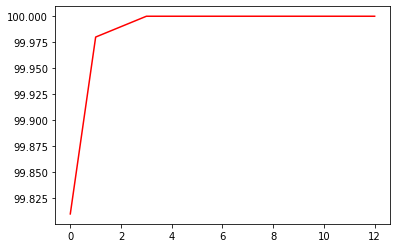

In [13]:
plt.plot(var1, color = 'red')

Observation: First 4 columns fulfil 100% variance. As given in problem statement, we consider first three columns, which covers 99.99% variance, for model building.

In [14]:
df_wines_pca = pd.DataFrame(df_wines_pca_temp[:,0:3], columns=['pca1', 'pca2','pca3'])
df_wines_pca.head()

,pca1,pca2,pca3
0,318.562979,21.492131,3.130735
1,303.097420,-5.364718,6.822835
2,438.061133,-6.537309,-1.113223
3,733.240139,0.192729,-0.917257
4,-11.571428,18.489995,-0.554422


In [15]:
# Normalization of PCA data
df_pca_norm = scale(df_wines_pca) 
df_pca_norm

array([[ 1.01428247e+00,  1.64083119e+00,  1.02194385e+00],
       [ 9.65041198e-01, -4.09572983e-01,  2.22713050e+00],
       [ 1.39475632e+00, -4.99095290e-01, -3.63381597e-01],
       [ 2.33458583e+00,  1.47140277e-02, -2.99413796e-01],
       [-3.68426271e-02,  1.41163108e+00, -1.80976123e-01],
       [ 2.23903942e+00, -2.53588776e-02,  3.09897954e-01],
       [ 1.72878392e+00, -1.03211461e+00,  6.94283081e-01],
       [ 1.74607355e+00,  8.74114622e-01,  1.32176577e-02],
       [ 9.48928735e-01, -6.24519656e-01,  1.26683960e+00],
       [ 9.48969140e-01, -5.42172076e-01,  5.08715679e-01],
       [ 2.42959297e+00, -6.36289059e-01, -6.15728582e-01],
       [ 1.69685434e+00, -1.09079902e+00,  4.25444212e-02],
       [ 1.82386510e+00, -1.60364196e+00,  1.21630064e-01],
       [ 1.28288644e+00, -1.22936652e+00,  1.85249624e+00],
       [ 2.54731461e+00, -9.25191008e-01,  9.94457463e-01],
       [ 1.79333492e+00,  1.69092585e-01, -1.71538877e-01],
       [ 1.69824388e+00,  8.24899899e-01

## **Hierarchical Clustering (With PCA)**

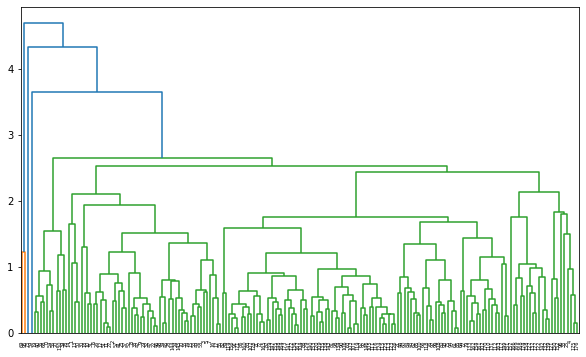

In [16]:
# Dendogram
plt.figure(figsize=(10,6))
dendo = sch.dendrogram(sch.linkage(df_pca_norm, method='average'))

Observation: Hierarchical clustering will be best with six clusters

In [17]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average').fit(df_pca_norm)

In [18]:
hc.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 4, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
df_wines_with_pca['hc_cluster'] = hc.labels_
df_wines_with_pca.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hc_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [20]:
df_wines_with_pca['hc_cluster'].value_counts()

0    163
1     11
4      2
3      1
2      1
Name: hc_cluster, dtype: int64

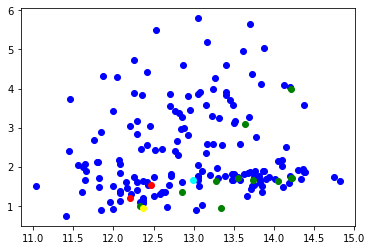

In [21]:
color = ['blue', 'green', 'cyan', 'yellow', 'red']
for i in range(0,5):
  data=df_wines_with_pca[df_wines_with_pca['hc_cluster']==i]
  plt.scatter(data['Alcohol'], data['Malic'], c=color[i])
plt.show()

## **KMeans Clustering (With PCA)**

In [22]:
# Find the optimal number of K
# The KMeans algorithm aims to choose centeroids that minimize the inertia, or within cluster sum of squares criteria

In [23]:
wcss= []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, random_state=123)
  kmeans.fit(df_pca_norm)
  wcss.append(kmeans.inertia_) # This is nothing but wss

In [24]:
wcss

[533.9999999999999,
 393.1628143084205,
 295.61841303598663,
 229.02919464948593,
 191.35225330043724,
 169.79726559997346,
 148.4839646495355,
 132.511355764366,
 124.30236120789117,
 112.82755827784385,
 103.84472144584214,
 97.22076335986111,
 91.74751490195905,
 85.85606936352391,
 83.04427477834119,
 76.70581850593352,
 74.01298512516772,
 70.82616702723706,
 64.9053243284145]

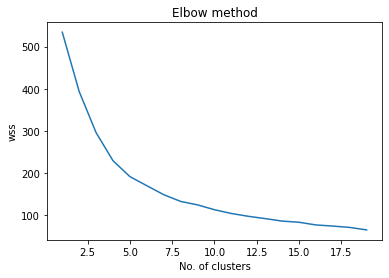

In [25]:
plt.plot(range(1,20), wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wss')
plt.show()

KMeans will be best by dividing into 10 clusters

In [26]:
kmeans_final1 = KMeans(n_clusters=10, random_state = 10)
kmeans_final1.fit(df_pca_norm) 

KMeans(n_clusters=10, random_state=10)

In [27]:
kmeans_final1.labels_

array([2, 5, 1, 1, 2, 1, 5, 1, 5, 5, 1, 5, 5, 5, 5, 1, 1, 1, 1, 2, 2, 0,
       5, 5, 0, 7, 5, 5, 0, 5, 1, 1, 5, 1, 1, 0, 2, 5, 5, 9, 2, 5, 5, 0,
       0, 1, 5, 5, 1, 1, 5, 5, 5, 1, 2, 1, 2, 5, 1, 6, 6, 6, 3, 3, 6, 0,
       6, 3, 2, 9, 0, 8, 8, 7, 0, 6, 6, 2, 9, 0, 6, 3, 8, 8, 6, 6, 8, 4,
       8, 8, 3, 3, 3, 6, 6, 9, 2, 6, 3, 6, 0, 3, 0, 3, 3, 3, 3, 8, 6, 0,
       0, 3, 0, 3, 3, 3, 3, 0, 6, 3, 0, 7, 4, 3, 3, 3, 3, 4, 8, 8, 2, 0,
       4, 0, 3, 0, 8, 4, 3, 4, 0, 8, 4, 3, 0, 0, 3, 8, 8, 7, 7, 7, 7, 0,
       0, 8, 3, 4, 4, 4, 8, 0, 0, 0, 8, 8, 7, 8, 4, 7, 0, 3, 8, 8, 4, 7,
       7, 4], dtype=int32)

In [28]:
df_wines_with_pca['km_cluster'] = kmeans_final1.labels_

In [29]:
df_wines_with_pca.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hc_cluster,km_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,5
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2


In [30]:
df_wines_with_pca['km_cluster'].value_counts()

0    29
3    29
5    24
8    21
1    19
6    16
4    13
2    12
7    11
9     4
Name: km_cluster, dtype: int64

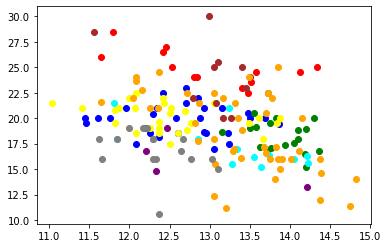

In [31]:
color = ['blue', 'green', 'cyan', 'yellow', 'red', 'orange', 'grey', 'brown', 'orange', 'purple']
for i in range(0,10):
  data=df_wines_with_pca[df_wines_with_pca['km_cluster']==i]
  plt.scatter(data['Alcohol'], data['Alcalinity'], c=color[i])
plt.show()

# Model creations without PCA

In [32]:
# normalization of original data
df_wines_without_pca_norm = scale(df_wines_without_pca)
df_wines_without_pca_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## **Hierarchical Clustering (Without PCA)**

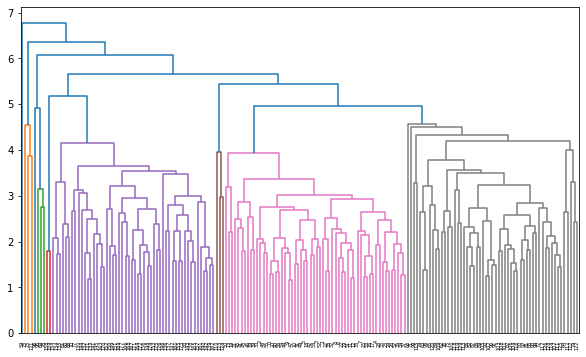

In [33]:
# Dendogram
plt.figure(figsize=(10,6))
dendo = sch.dendrogram(sch.linkage(df_wines_without_pca_norm, method='average'))

Observation: Hierarchical clustering will be best with five clusters

In [34]:
hc2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average').fit(df_wines_without_pca_norm)

In [35]:
hc2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 4, 1, 0, 0, 2, 0, 0, 0, 1, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [36]:
df_wines_without_pca['hc2_cluster'] = hc2.labels_
df_wines_without_pca.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hc2_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [37]:
df_wines_without_pca['hc2_cluster'].value_counts()

0    116
1     54
4      4
2      3
3      1
Name: hc2_cluster, dtype: int64

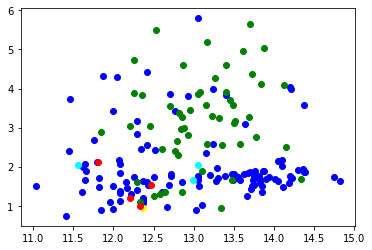

In [38]:
color = ['blue', 'green', 'cyan', 'yellow', 'red']
for i in range(0,5):
  data=df_wines_with_pca[df_wines_without_pca['hc2_cluster']==i]
  plt.scatter(data['Alcohol'], data['Malic'], c=color[i])
plt.show()

## **KMeans Clustering (Without PCA)**

In [39]:
# Find the optimal number of K
# The KMeans algorithm aims to choose centeroids that minimize the inertia, or within cluster sum of squares criteria

In [40]:
wcss= []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, random_state=123)
  kmeans.fit(df_wines_without_pca_norm)
  wcss.append(kmeans.inertia_) # This is nothing but wss

In [41]:
wcss

[2314.0,
 1658.758852429095,
 1277.9284888446423,
 1180.732841334701,
 1115.9538989422415,
 1047.180420464103,
 984.8317197715671,
 932.8504726860997,
 900.0460248490566,
 861.0408670541979,
 826.8352788435261,
 793.8403642458084,
 768.3957679794883,
 741.3204405481674,
 713.063174579371,
 695.427888699468,
 679.8552053949219,
 665.9195906256512,
 644.0545918454382]

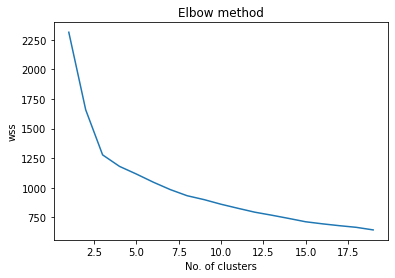

In [42]:
plt.plot(range(1,20), wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wss')
plt.show()

KMeans will be best by dividing into 10 clusters

In [43]:
kmeans_final2 = KMeans(n_clusters=10, random_state = 10)
kmeans_final2.fit(df_wines_without_pca_norm) 

KMeans(n_clusters=10, random_state=10)

In [44]:
kmeans_final2.labels_

array([7, 7, 4, 1, 4, 1, 7, 4, 7, 7, 1, 7, 7, 1, 1, 4, 4, 4, 1, 7, 7, 4,
       7, 4, 4, 4, 7, 7, 4, 7, 4, 1, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 1, 7, 7, 1, 4, 7, 4, 7, 4, 1, 3, 3, 3, 3, 9, 0, 6,
       9, 9, 3, 8, 3, 4, 9, 4, 6, 3, 9, 3, 8, 6, 9, 9, 0, 2, 6, 9, 0, 0,
       0, 0, 0, 0, 0, 9, 9, 8, 4, 9, 6, 6, 9, 9, 6, 9, 9, 0, 9, 0, 9, 6,
       6, 9, 0, 0, 0, 0, 9, 9, 2, 9, 6, 6, 0, 6, 6, 9, 6, 0, 0, 0, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       2, 2, 5, 5, 5, 5, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 5, 5,
       5, 5], dtype=int32)

In [45]:
df_wines_without_pca['km2_cluster'] = kmeans_final2.labels_

In [46]:
df_wines_without_pca.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hc2_cluster,km2_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,7
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,7
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,4
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,4


In [47]:
df_wines_without_pca['km2_cluster'].value_counts()

2    30
7    28
4    24
9    22
0    19
5    19
6    14
1    10
3     9
8     3
Name: km2_cluster, dtype: int64

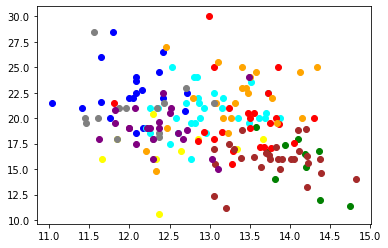

In [48]:
color = ['blue', 'green', 'cyan', 'yellow', 'red', 'orange', 'grey', 'brown', 'orange', 'purple']
for i in range(0,10):
  data=df_wines_without_pca[df_wines_without_pca['km2_cluster']==i]
  plt.scatter(data['Alcohol'], data['Alcalinity'], c=color[i])
plt.show()

Final Observation: Minor differences exists in allocation of clusters, when Hierarchical and KMeans clustering modles were created with and without PCA data. 